#***1.2 Optimization***


Chose to use CNNs.

In [1]:
# pip install torch

In [2]:
# pip install torchvision

In [2]:
import torch
import os
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
project_name = "01-cifar10-cnn"

In [4]:
# download the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, ".")

Using downloaded and verified file: ./cifar10.tgz


In [5]:
# extract from archive into train and test dataset
# with tarfile.open("./cifar10.tgz", "r:gz") as tar:
#   tar.extractall(path="./data")

In [6]:
data_dir = "./data/cifar10"
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['frog', 'bird', 'airplane', 'dog', 'deer', 'cat', 'automobile', 'truck', 'ship', 'horse']


In [7]:
# transform the images into tensors
dataset = ImageFolder(data_dir+"/train", transform=ToTensor())

In [8]:
img, label = dataset[0]

# prints 3 32x32 matrices
print(img.shape, label)

# list of classes is stored in the .classes property
print(dataset.classes)

torch.Size([3, 32, 32]) 0
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Changing tensor dimensions to be viewable in Matplotlib.

In [13]:
from torch.utils.data.dataloader import DataLoader
batch_size = 4

In [14]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [15]:
# divides data into batches
train_dl = DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_dl = DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

# **Creating Networks**

effect of conv2d layer on width and height:
W = input width/input height
F = Filter width/filter height
P = Padding
S = Stride
(W-F +2P)/S+1

effect of pooling layer:
W/2

flattening dimensions need to be equal to:
number_of_filters*output_height*output_width

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
from torch.nn.modules import Softmax
from torch.nn.modules.activation import ReLU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*12*12, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.25)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.Dropout(x)
    x = x.view(-1, 16*12*12)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model_one = ConvNet().to(device)
model_one

ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2304, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (Dropout): Dropout(p=0.25, inplace=False)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
# NOTE: check your values!! just wasted a bunch of time.
class ConvNet_two(nn.Module):
  def __init__(self):
    super(ConvNet_two, self).__init__()
    self.conv1 = nn.Conv2d(3,12,3)
    self.conv2 = nn.Conv2d(12,18,3)
    self.conv3 = nn.Conv2d(18,26,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(26*6*6, 100)
    self.fc2 = nn.Linear(100, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.Dropout(x)
    x = x.view(-1, 26*6*6)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model_two = ConvNet_two().to(device)
model_two

ConvNet_two(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(12, 18, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(18, 26, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=936, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=84, bias=True)
  (Dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [21]:
class ConvNet_three(nn.Module):
  def __init__(self):
    super(ConvNet_three, self).__init__()
    self.conv1 = nn.Conv2d(3,64,3)
    self.conv2 = nn.Conv2d(64,128,3)
    self.conv3 = nn.Conv2d(128,256,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(256*6*6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.Dropout(x)
    x = x.view(-1, 256*6*6)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model_three = ConvNet_three().to(device)
model_three

ConvNet_three(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (Dropout): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# **Creating functions to train the networks.**
CollectWeights class: is responsible for gathering all of the weights of the model in each epic

fit_model function: is responsible for training the model.

evaulate_model: is responsible for calculating the accuracy of the model

gradient_norm function: is responsible for recording the gradient norm and the loss during training

In [22]:
# collect weights function
class CollectWeights:
  def __init__(self, model):
    self.model = model
    self.epoch_weights = []

  def end_of_epoch(self, epoch, logs={}):
    state_dict = self.model.state_dict()
    self.epoch_weights.append(state_dict)

In [26]:
# fit model function
n_total_steps = len(train_dl)
num_epochs = 10

def fit_model(model):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=.001)
  callback = CollectWeights(model)
  model_list = []
  gradient_list = []

  # begin training loop
  for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_dl):
      images = images.to(device)
      labels = labels.to(device)

      # forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (i % len(train_dl) == 0):
        print(f'MODEL: Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

        # record gradient norm
        grad_all = 0.0

        for p in model.parameters():
          grad = 0.0
          if p.grad is not None:
            grad = (p.grad.cpu().data.numpy()**2).sum()
          grad_all += grad

        grad_norm = grad_all ** 0.5
        gradient_list.append(grad_norm)
        
        # collects loss values
        model_list.append(loss.item())
        
        # collect weights
        callback.end_of_epoch(epoch)

  print(f'MODEL: Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
  #collect parameters of model at every epoch
  params = model.state_dict()
  for name, param in params.items():
    print(f'{name}: {param.shape}')
  return model_list, callback.epoch_weights, gradient_list


In [24]:
# evaluate model accuracy

model_one_accuracy = []
model_two_accuracy = []
model_three_accuracy = []

def evaluate_model (model, model_list):
  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images,labels in val_dl:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      accuract_value = 100*correct/total
      model_list.append(accuract_value)
      i = 0
      
    print(f"Accuract of the model on the test images: {100*correct/total}%")

In [37]:
# plot the loss of your model's training in comparison to testing
def plot_comp(training, testing, metric, title="Training vs Testing"):
    plt.plot(training, color="red", label="gradient")
    plt.plot(testing, color="blue", label="loss")

    plt.xlabel('Test Images')
    plt.ylabel(metric)
    plt.title(title)
    plt.legend()
    plt.show()

# **Model Training and Evaluation**
Each cell below includes the model's training and evaluation functions.

In [27]:
model_one_loss = []
model_one_weights = []
model_one_gradients = []

# train and evaluate the model
model_one_loss, model_one_weights, model_one_gradients = fit_model(model_one)
print("Model [1] Loss: ", model_one_loss[-1])
evaluate_model(model_one, model_one_accuracy)

MODEL: Epoch [1/10], Step [1/11250], Loss: 2.2951
MODEL: Epoch [2/10], Step [1/11250], Loss: 2.3393
MODEL: Epoch [3/10], Step [1/11250], Loss: 1.4791
MODEL: Epoch [4/10], Step [1/11250], Loss: 1.8584
MODEL: Epoch [5/10], Step [1/11250], Loss: 1.2505
MODEL: Epoch [6/10], Step [1/11250], Loss: 1.8282
MODEL: Epoch [7/10], Step [1/11250], Loss: 0.8233
MODEL: Epoch [8/10], Step [1/11250], Loss: 2.0230
MODEL: Epoch [9/10], Step [1/11250], Loss: 0.6729
MODEL: Epoch [10/10], Step [1/11250], Loss: 0.5891
MODEL: Epoch [10/10], Step [11250/11250], Loss: 0.8258
conv1.weight: torch.Size([6, 3, 5, 5])
conv1.bias: torch.Size([6])
conv2.weight: torch.Size([16, 6, 5, 5])
conv2.bias: torch.Size([16])
fc1.weight: torch.Size([120, 2304])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])
Model [1] Loss:  0.5891302824020386
Accuract of the model on the test images: 50.38%


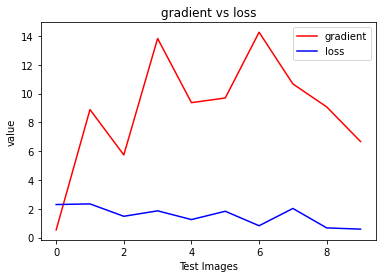

In [38]:
plot_comp(model_one_gradients, model_one_loss, "value", "gradient vs loss")

In [ ]:
model_two_loss = []
model_two_weights = []

# train and evaluate the model
model_two_loss, model_two_weights, model_two_gradients = fit_model(model_two)
evaluate_model(model_two, model_two_accuracy)

MODEL: Epoch [1/10], Step [1/11250], Loss: 2.3468
MODEL: Epoch [2/10], Step [1/11250], Loss: 2.3085
MODEL: Epoch [3/10], Step [1/11250], Loss: 2.3032
MODEL: Epoch [4/10], Step [1/11250], Loss: 2.3031
MODEL: Epoch [5/10], Step [1/11250], Loss: 2.3054
MODEL: Epoch [6/10], Step [1/11250], Loss: 2.2936


In [ ]:
plot_comp(model_two_gradients, model_two_loss, "value", "gradient vs loss")

In [ ]:
model_three_loss = []
model_three_weights = []

# train and evaluate the model
model_three_loss, model_three_weights, model_three_gradients = fit_model(model_three)
evaluate_model(model_three, model_three_accuracy)

In [ ]:
plot_comp(model_three_gradients, model_three_loss, "value", "gradient vs loss")

# **Visualizing Optimization**
Couldn't figure out how to mimic what Dr. Feng had done in the powerpoint.

In [32]:
# create a scatter plot of the weights from the models
epoch_iters = ["epoch_"+str(i+1) for i in range(num_epochs)]

def parse_weights(model_weights):
  list = []
  for i in model_weights:
    for item in i.keys():
      if 'weight' in item:
        print(item)
        list.append(i)
  return list
    
model_1_weights = parse_weights(model_one_weights)
model_1_weights[0]["conv1.weight"]

conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight
conv1.weight
conv2.weight
fc1.weight
fc2.weight
fc3.weight


tensor([[[[-2.1875e-01, -1.8612e-01, -2.0453e-01, -2.7057e-01, -1.3709e-01],
          [ 3.8308e-02,  6.4009e-02, -5.4242e-02, -7.5104e-02, -3.7610e-02],
          [ 2.2358e-01,  1.7457e-01,  1.9435e-01,  7.4879e-02,  9.9095e-02],
          [ 2.5909e-02,  1.9187e-01,  8.5093e-02, -5.3806e-02,  8.5532e-02],
          [ 1.0364e-01,  8.7662e-02,  8.9987e-02, -9.4122e-02, -1.0434e-01]],

         [[ 2.2145e-01,  1.3964e-01,  8.5202e-02,  1.7724e-01,  6.0787e-02],
          [ 3.6026e-01,  2.6792e-01,  2.4656e-01,  3.3536e-01,  3.1679e-01],
          [ 3.1944e-01,  4.1890e-01,  3.0350e-01,  1.8773e-01,  2.4294e-01],
          [ 1.5940e-01,  1.5329e-01,  4.8700e-02,  1.3617e-01,  4.3324e-02],
          [ 1.1247e-01,  1.0345e-01, -7.6892e-03,  1.3513e-01,  1.8519e-01]],

         [[-1.2530e-01, -1.7472e-01, -5.3944e-02, -9.6858e-02, -1.9426e-01],
          [ 4.1281e-03,  7.8454e-02,  3.8149e-02,  4.5429e-03, -1.2123e-02],
          [ 5.4402e-02, -1.6463e-02,  4.5597e-02, -1.5616e-01, -4.6025e-